# MoReBo
MoReBo welcomes you!

![MoReBo Logo](MoReBo.jpg)

MoReBo Logo source: https://campk12.com/project/joydeep.chanda/movie-bot

## Table of content

1. [Context](#context)
    - [Introduction](#introduction)
    - [Background](#background)
    - [Problem Statement](#problem-statement)
    
1. [ Data Exploration](#data-exploration)
    - [Overview of Data](#overview-of-data)
    - [Data Cleaning](#data-cleaning)
    - [Data Visualization](#data-visualization)
    - [Statistical Analysis](#statistical-analysis)

## Context

### Introduction
MoReBo stands for Movie Recommendations Bot.
With MoReBo we wanted to create a bot which recommends movies to a user.
The way the recommendation is defined was developed with two models which work differently:
1. The first approach was using the data of user reviews for movies. The reviews consisted of information about the movie (Title, year and genre) and some information about the reviewer (age, gender and occupation). Additionally each review had a rating from 1 to 5 where 1 was considered bad and 5 was considered great. The recommendation is based on the information and the score of the reviewer. A movie with a lot of high reviews from similar reviewers should therefore be recommended to a ficticious user.
2. The second approach was using additionally to the first dataset also an extended dataset with more information about the movie itself. The reviews were not a focus of this approach and were therefore eliminated from the dataset. Instead, the movie entry was enhanced with more information (director, writer, actors, ...). Based on this metadata of the movie, similar movies shall be recommended to a ficticious user.

### Background
### Problem Statement

## Data cleansing

### Overview of Data
### Data Cleaning
### Data Visualization
### Statistical Analysis


First we need to load our data into memory. We will create a different dataframe for each file. These dataframes will be merged at a later stage.

In [1]:
%pip install pandas
import pandas as pd

# Read the data
movies = pd.read_csv('data/movies.dat', sep='::', engine='python', names=['movieId', 'title', 'genres'], encoding="ISO-8859-1")
ratings = pd.read_csv('data/ratings.dat', sep='::', engine='python', names=['userId', 'movieId', 'rating', 'timestamp'])
users = pd.read_csv('data/users.dat', sep='::', engine='python', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])

You should consider upgrading via the 'c:\Users\jansc\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Now that we have created our dataframes let's have a brief look at our data. Using the `head()` function we can display the first 5 rows of our dataframes.

In [2]:
# Print the first 5 rows of the movies dataframe
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Print the first 5 rows of the ratings dataframe
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# Print the first 5 rows of the users dataframe
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


When looking at the __movies__ dataframe we can see that we have different data in the _title_ column. The title column should only contain the title of the movie. Of course we still want to keep the year but we would like to have it in a seperate column. Let's create a new column for the movies release data and remove it from the title column.

In [5]:
# Create a new column for the year
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

# Convert year to int
movies['year'] = movies['year'].astype(int)

# Remove the year from the title
movies['title'] = movies['title'].str.replace(r"\s\(\d{4}\)","", regex=True)

By looking at the output of our `head()` function we can see that we still have some data issues in our dataframe. The _genre_ column contains all genres of a single movie in one field. To better work with our data we are going to create dummy variables for every genre.

In [6]:
# Create dummy variables for the genres
movies = movies.join(movies['genres'].str.get_dummies(sep='|'))
movies.head()

,movieId,title,genres,year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Animation|Children's|Comedy,1995,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# TODO
For some reason the titles werent formated correctly. For Example some titles were separated by a ",". Instead of for example "The Confessional" the title was "Confessional, The". So we had to reformat the the titles of the movies dataframe, such that its displayed correctly.

In [7]:
#extract the title  column from the movies dataframe
titles = movies['title']

#split the titles after the separator "," into separate columns and assign them to the titles dataframe
titles = titles.str.split(',', expand=True)

#drop column2 from the titles dataframe
titles = titles.drop(2, axis=1)

#rename the names of the columns to column1 and column2
titles.columns = ['col1', 'col2']

#add the column2 column to the column1 column if the column2 column is not empty
titles['new_col'] = titles.apply(lambda x: x['col1'] if x['col2'] is None or x['col2']=='' else str(x['col2'])+" "+x['col1'], axis=1)

#drop the column2 column from the titles dataframe
titles = titles.drop('col2', axis=1)

#replace the title column in the movies dataframe with the titles dataframe
movies['title'] = titles['new_col']

Now that we have cleaned our data we can merge our seperate dataframes into a single dataframe. This dataframe will be used for the remainder of this notebook.

In [8]:
# Merge the data
merged = pd.merge(movies, ratings, on='movieId', how='inner')
merged = pd.merge(merged, users, on='userId', how='inner')
merged.head()

,movieId,title,genres,year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Thriller,War,Western,userId,rating,timestamp,gender,age,occupation,zip-code
0,1,Toy Story,Animation|Children's|Comedy,1995,0,0,1,1,1,0,...,0,0,0,1,5,978824268,F,1,10,48067
1,48,Pocahontas,Animation|Children's|Musical|Romance,1995,0,0,1,1,0,0,...,0,0,0,1,5,978824351,F,1,10,48067
2,150,Apollo 13,Drama,1995,0,0,0,0,0,0,...,0,0,0,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1977,1,1,0,0,0,0,...,0,0,0,1,4,978300760,F,1,10,48067
4,527,Schindler's List,Drama|War,1993,0,0,0,0,0,0,...,0,1,0,1,5,978824195,F,1,10,48067


Make the data readable

In [9]:
# Transform column age to categorical and change the labels
merged['age'] = merged['age'].astype('category')
merged['age'].cat.categories = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

# Transform column occupation to categorical and change the labels
merged['occupation'] = merged['occupation'].astype('category')
merged['occupation'].cat.categories = ['other', 'academic/educator', 'artist', 'clerical/admin', 'college/grad student', 'customer service', 'doctor/health care', 'executive/managerial', 'farmer', 'homemaker', 'K-12 student', 'lawyer', 'programmer', 'retired', 'sales/marketing', 'scientist', 'self-employed', 'technician/engineer', 'tradesman/craftsman', 'unemployed', 'writer']

C:\Users\jansc\AppData\Local\Temp\ipykernel_6488\2535245187.py:3: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  merged['age'].cat.categories = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
C:\Users\jansc\AppData\Local\Temp\ipykernel_6488\2535245187.py:7: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  merged['occupation'].cat.categories = ['other', 'academic/educator', 'artist', 'clerical/admin', 'college/grad student', 'customer service', 'doctor/health care', 'executive/managerial', 'farmer', 'homemaker', 'K-12 student', 'lawyer', 'programmer', 'retired', 'sales/marketing', 'scientist', 'self-employed', 'technician/engineer', 'tradesman/craftsman', 'unemployed', 'writer']


To save time we are going to save our merged dataframe as a .csv file. By doing this we can load our data again without having to clean and merge it.

In [10]:
# Save the merged dataset as a new csv file
merged.to_csv('data/merged.csv', index=False, sep=';')

## Data Exploration

# TODO
Let's have a look at our data.

<Axes: >

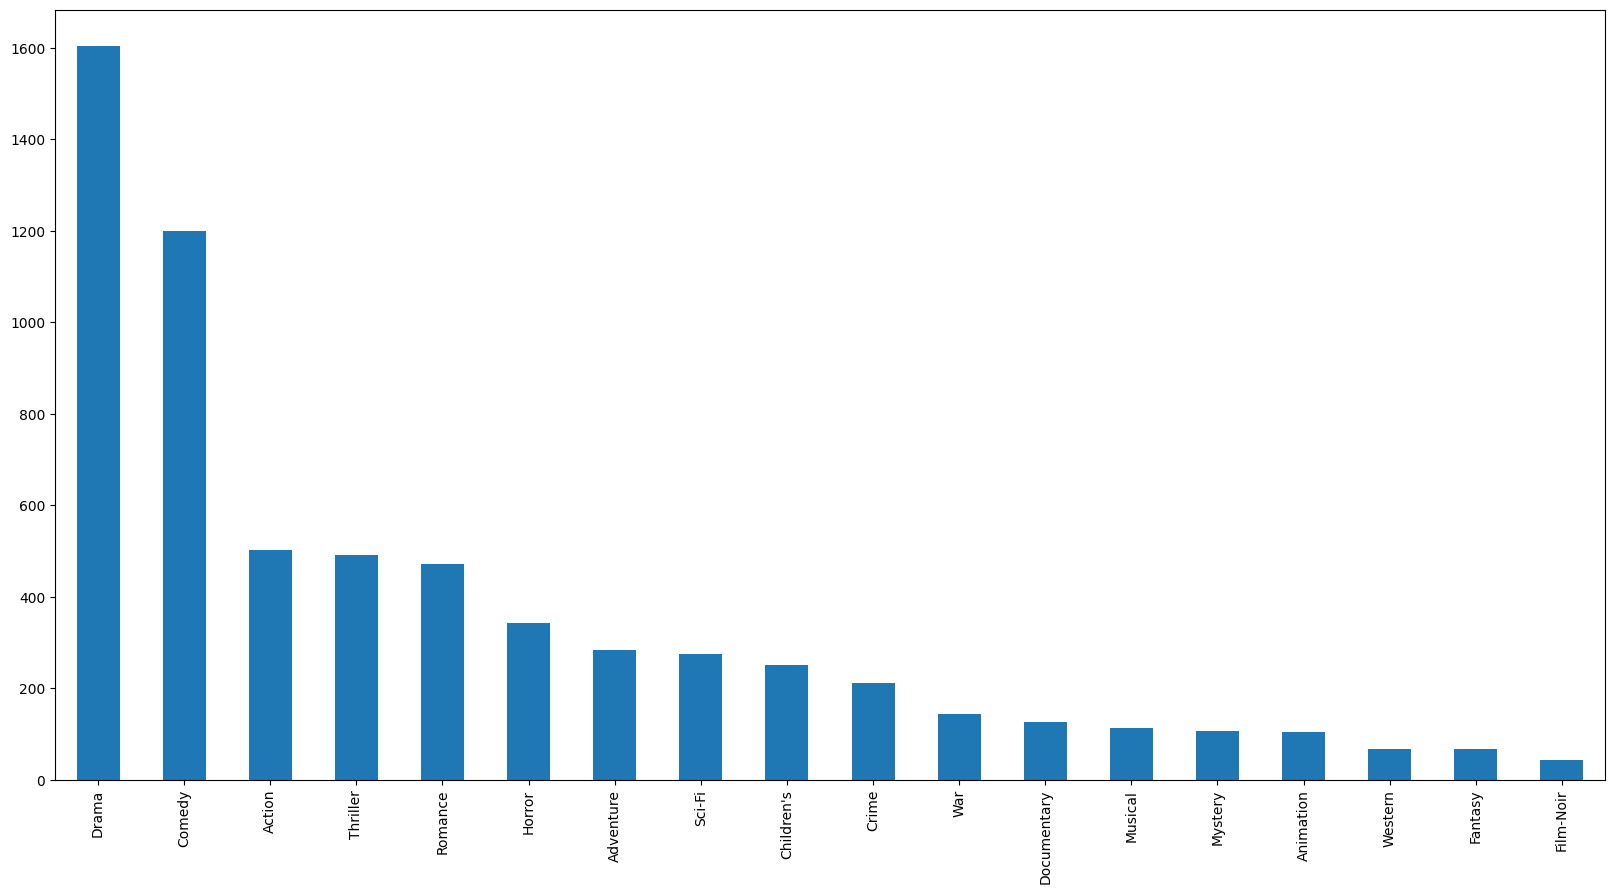

In [11]:
# Create a barchart for the number of movies for every genre
movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

<Axes: >

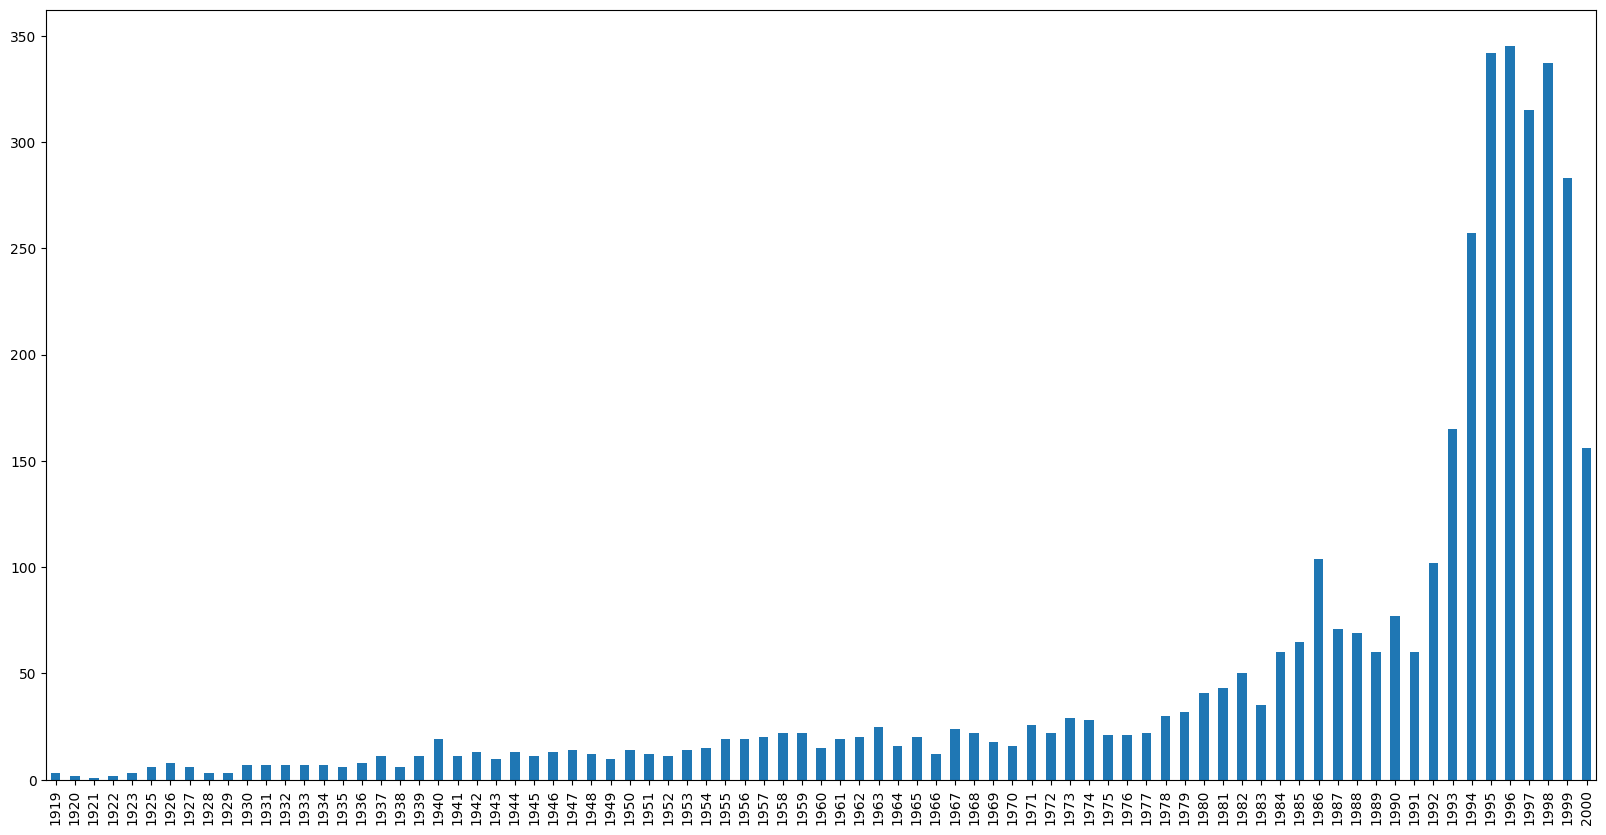

In [12]:
# Create a barchart for the number of movies for every year
movies['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

<Axes: >

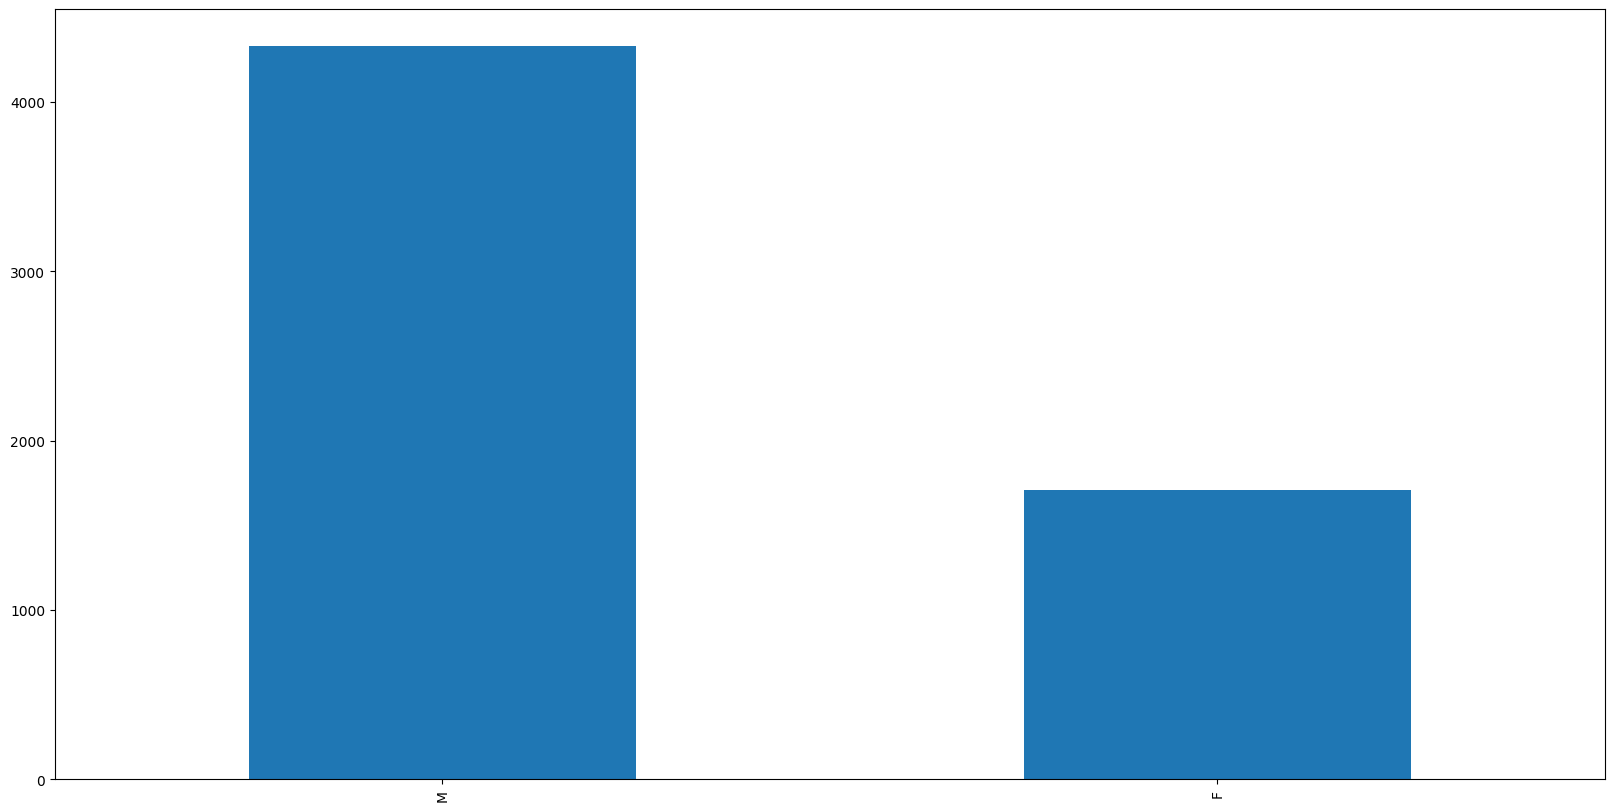

In [15]:
#create a barchart for the genders in the users dataframe
users['gender'].value_counts().plot(kind='bar', figsize=(20,10))


<Axes: >

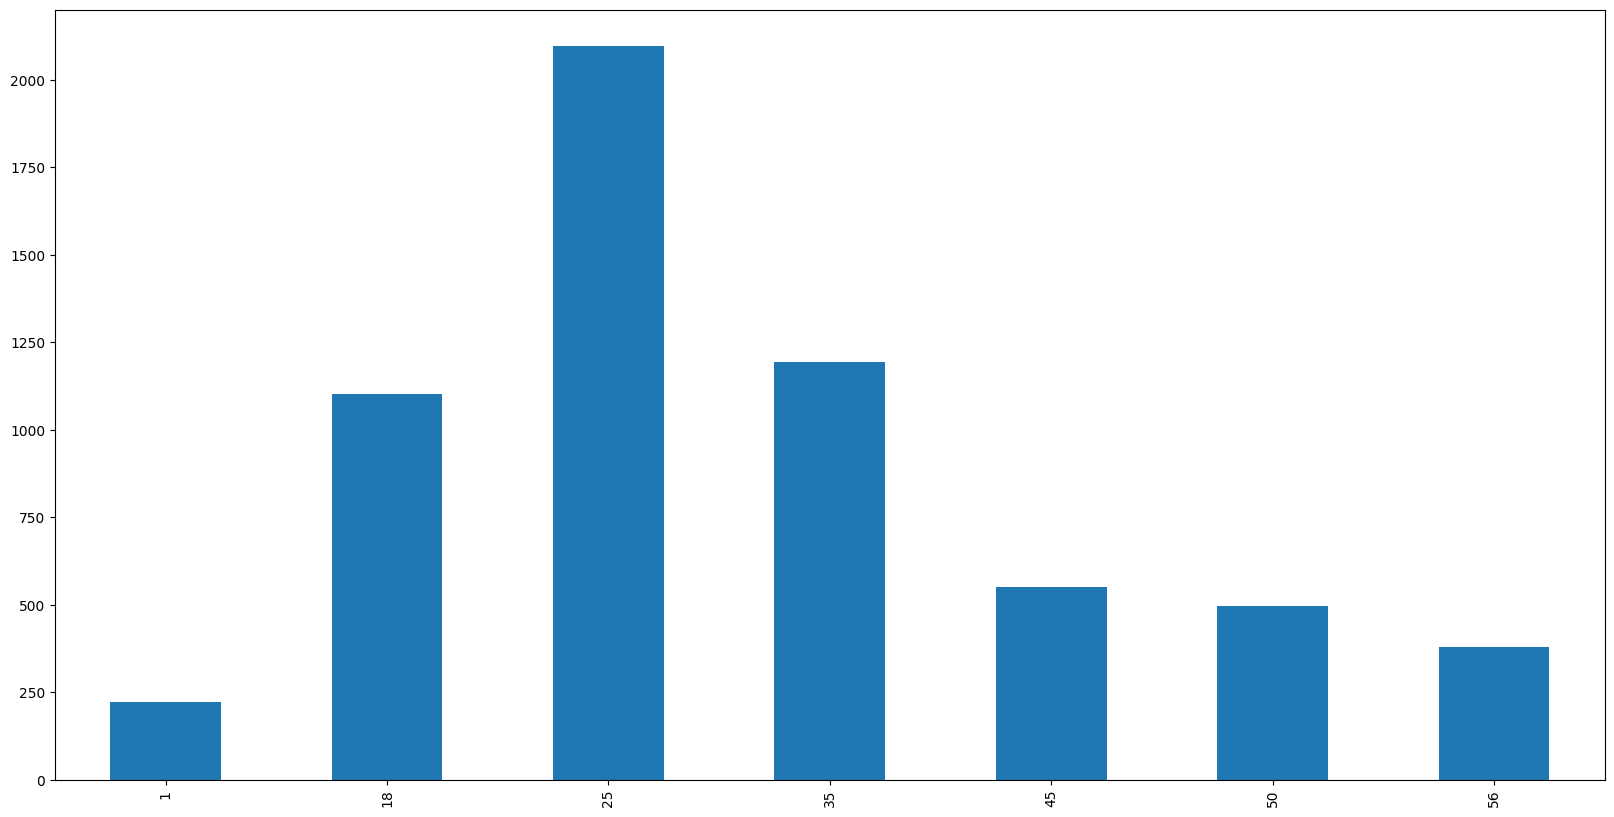

In [16]:
#create a barchart for the ages in the users dataframe
users['age'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

<Axes: >

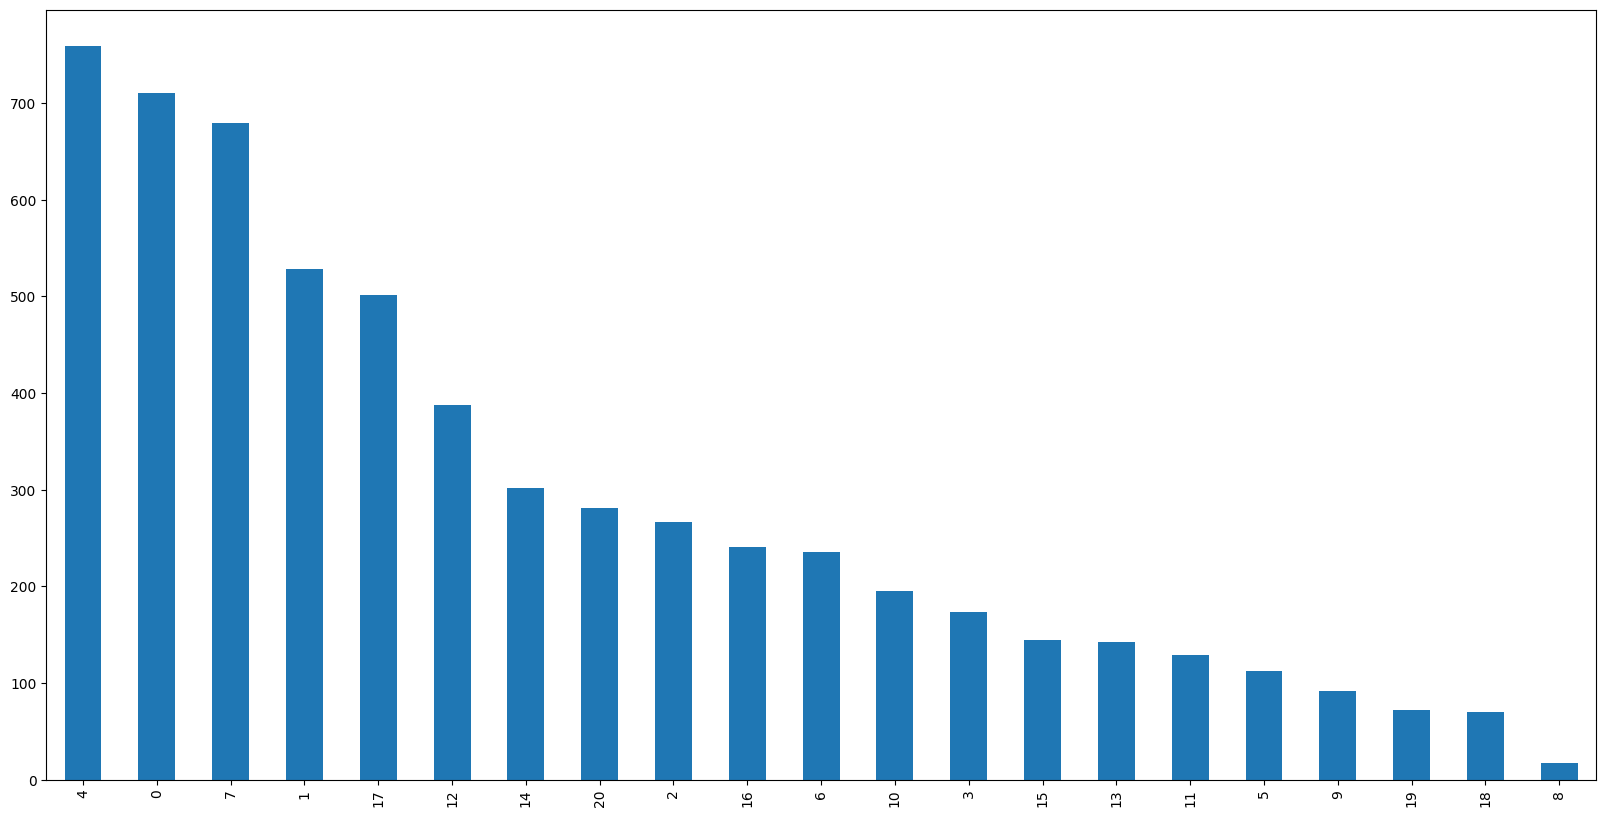

In [17]:
#create a barchart for the occupations in the users dataframe
users['occupation'].value_counts().plot(kind='bar', figsize=(20,10))